# Jimmy Wrangler Data Explorer
a project for EECS 731 by Benjamin Wyss

Examining health industry data sets to explore the relation between covid-19 cases, population density, and mask usage by US county

###### Python imports

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')

### Reading Data Sets From CSV Files
###### Population density data by US county:

taken from https://covid19.census.gov/datasets/21843f238cbb46b08615fc53e19e0daf/data?geometry=136.810%2C28.795%2C-136.179%2C67.148 on 9/5/20

In [43]:
populations = pd.read_csv('../data/raw/us_county_population_density.csv')


In [44]:
populations

,FID,COUNTYNS,GEOID,ALAND,AWATER,NAME,State,B25010_001E,B25010_001M,B25010_002E,...,B01001_001E,B01001_001M,B01001_calc_PopDensity,created_user,created_date,last_edited_user,last_edited_date,B01001_calc_PopDensityM,SHAPE_Length,SHAPE_Area
0,1,161526,1001,1539602123,25706961,Autauga County,Alabama,2.59,0.05,2.59,...,55200,NaN,35.853419,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,2.066037,0.150256
1,2,161527,1003,4117546676,1133055836,Baldwin County,Alabama,2.61,0.04,2.66,...,208107,NaN,50.541504,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,4.483746,0.409904
2,3,161528,1005,2292144655,50538698,Barbour County,Alabama,2.49,0.07,2.44,...,25782,NaN,11.247981,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,2.695262,0.223270
3,4,161529,1007,1612167481,9602089,Bibb County,Alabama,2.99,0.14,3.05,...,22527,NaN,13.973114,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,1.887514,0.156473
4,5,161530,1009,1670103911,15015423,Blount County,Alabama,2.77,0.05,2.85,...,57645,NaN,34.515816,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,2.423552,0.164405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3216,1804553,72145,118777649,57795019,Vega Baja Municipio,Puerto Rico,2.93,0.09,2.93,...,53371,NaN,449.335380,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,0.485650,0.010381
3216,3217,1804554,72147,131541395,552192819,Vieques Municipio,Puerto Rico,3.55,0.38,3.03,...,8771,NaN,66.678630,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,0.675819,0.012181
3217,3218,1804555,72149,92298569,3622639,Villalba Municipio,Puerto Rico,2.96,0.10,3.09,...,22993,NaN,249.115455,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,0.431598,0.008189
3218,3219,1804556,72151,143005179,72592521,Yabucoa Municipio,Puerto Rico,2.91,0.10,2.90,...,34149,NaN,238.795547,esri_demographics,2020/04/01 20:53:36,esri_demographics,2020/04/01 20:53:36,0.0,0.676628,0.012229


###### Covid-19 cases by US county:

taken from https://github.com/nytimes/covid-19-data/tree/master/live on 9/3/20

In [45]:
covidCases = pd.read_csv('../data/raw/us_county_covid19_cases.csv')

In [46]:
covidCases

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-09-03,Autauga,Alabama,1001.0,1466,24.0,1349.0,23.0,117.0,1.0
1,2020-09-03,Baldwin,Alabama,1003.0,4628,44.0,4495.0,40.0,133.0,4.0
2,2020-09-03,Barbour,Alabama,1005.0,771,7.0,614.0,7.0,157.0,0.0
3,2020-09-03,Bibb,Alabama,1007.0,564,8.0,542.0,6.0,22.0,2.0
4,2020-09-03,Blount,Alabama,1009.0,1336,11.0,1037.0,11.0,299.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3228,2020-09-03,Sweetwater,Wyoming,56037.0,304,2.0,285.0,NaN,19.0,NaN
3229,2020-09-03,Teton,Wyoming,56039.0,433,1.0,398.0,NaN,35.0,NaN
3230,2020-09-03,Uinta,Wyoming,56041.0,303,2.0,251.0,NaN,52.0,NaN
3231,2020-09-03,Washakie,Wyoming,56043.0,108,6.0,100.0,NaN,8.0,NaN


###### Reported mask use by US county:

taken from https://github.com/nytimes/covid-19-data/tree/master/mask-use on 9/3/20

results collected via a national NYTimes survey where participants were asked 

"How often do you wear a mask in public when you expect to be within six feet of another person?"

In [47]:
maskUse = pd.read_csv('../data/raw/us_county_mask_use.csv')

In [48]:
maskUse

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


# The Big Ideas

These data sets can be combined to examine both:

(1): By US county, the relationship between covid-19 cases per unit population and the rate at which individuals respond that they wear a face mask in a public setting in which they expect to be within 6 feet of another person

(2): By US county, The relationship between population density and mask usage

These two relationships can be examined together to determine the impact of population density and mask usage in the total percentage of covid-19 cases by US county

### Cleaning the data sets

Removing columns that will not be used in analysis and rows corresponding to unknown data. By removing rows of covid-19 cases where the county is unknown, a lower bound for covid-19 cases will be obtained.

In [49]:
populations = populations[['GEOID', 'B01001_001E', 'B01001_calc_PopDensity']]
populations = populations.rename(columns={'GEOID': 'fips_code', 'B01001_001E': 'population', 'B01001_calc_PopDensity': 'population_density'})

In [50]:
populations

,fips_code,population,population_density
0,1001,55200,35.853419
1,1003,208107,50.541504
2,1005,25782,11.247981
3,1007,22527,13.973114
4,1009,57645,34.515816
...,...,...,...
3215,72145,53371,449.335380
3216,72147,8771,66.678630
3217,72149,22993,249.115455
3218,72151,34149,238.795547


In [51]:
covidCases = covidCases[covidCases.county != 'Unknown']
covidCases = covidCases[['fips', 'county', 'state', 'cases']]
covidCases = covidCases.rename(columns={'fips': 'fips_code'})

In [52]:
covidCases

,fips_code,county,state,cases
0,1001.0,Autauga,Alabama,1466
1,1003.0,Baldwin,Alabama,4628
2,1005.0,Barbour,Alabama,771
3,1007.0,Bibb,Alabama,564
4,1009.0,Blount,Alabama,1336
...,...,...,...,...
3228,56037.0,Sweetwater,Wyoming,304
3229,56039.0,Teton,Wyoming,433
3230,56041.0,Uinta,Wyoming,303
3231,56043.0,Washakie,Wyoming,108


In [53]:
maskUse = maskUse.rename(columns={'COUNTYFP': 'fips_code', 'NEVER': 'never', 'ALWAYS': 'always', 'RARELY': 'rarely', 'SOMETIMES': 'sometimes', 'FREQUENTLY': 'frequently'})

In [54]:
maskUse

,fips_code,never,rarely,sometimes,frequently,always
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


### Merging the data sets together

merge based on county fips code

In [55]:
df = pd.merge(populations, covidCases, on='fips_code')
df = pd.merge(df, maskUse, on='fips_code')

In [56]:
df

,fips_code,population,population_density,county,state,cases,never,rarely,sometimes,frequently,always
0,1001,55200,35.853419,Autauga,Alabama,1466,0.053,0.074,0.134,0.295,0.444
1,1003,208107,50.541504,Baldwin,Alabama,4628,0.083,0.059,0.098,0.323,0.436
2,1005,25782,11.247981,Barbour,Alabama,771,0.067,0.121,0.120,0.201,0.491
3,1007,22527,13.973114,Bibb,Alabama,564,0.020,0.034,0.096,0.278,0.572
4,1009,57645,34.515816,Blount,Alabama,1336,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...,...,...,...,...,...
3115,56037,44117,1.633615,Sweetwater,Wyoming,304,0.061,0.295,0.230,0.146,0.268
3116,56039,23059,2.227539,Teton,Wyoming,433,0.095,0.157,0.160,0.247,0.340
3117,56041,20609,3.822405,Uinta,Wyoming,303,0.098,0.278,0.154,0.207,0.264
3118,56043,8129,1.402002,Washakie,Wyoming,108,0.204,0.155,0.069,0.285,0.287


### Transforming the data

calculating covid-19 cases per unit population, then converting decimals to percents. Percents were chosen because most decimals in the data set are relatively small, and plots will be easier to read with percents.

Additionally, a linear scale from 1-5 of mask usage is calculated such that a score of 1 indicates no mask usage and a score of 5 indicates perfect mask usage

In [57]:
df['mask_use'] = df['never'] + df['rarely'] * 2 + df['sometimes'] * 3 + df['frequently'] * 4 + df['always'] * 5
df['cases_per_population_percent'] = df['cases']/df['population'] * 100
df['never'] = df['never'] * 100
df['rarely'] = df['rarely'] * 100
df['sometimes'] = df['sometimes'] * 100
df['frequently'] = df['frequently'] * 100
df['always'] = df['always'] * 100

In [58]:
df

,fips_code,population,population_density,county,state,cases,never,rarely,sometimes,frequently,always,mask_use,cases_per_population_percent
0,1001,55200,35.853419,Autauga,Alabama,1466,5.3,7.4,13.4,29.5,44.4,4.003,2.655797
1,1003,208107,50.541504,Baldwin,Alabama,4628,8.3,5.9,9.8,32.3,43.6,3.967,2.223856
2,1005,25782,11.247981,Barbour,Alabama,771,6.7,12.1,12.0,20.1,49.1,3.928,2.990458
3,1007,22527,13.973114,Bibb,Alabama,564,2.0,3.4,9.6,27.8,57.2,4.348,2.503662
4,1009,57645,34.515816,Blount,Alabama,1336,5.3,11.4,18.0,19.4,45.9,3.892,2.317634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,56037,44117,1.633615,Sweetwater,Wyoming,304,6.1,29.5,23.0,14.6,26.8,3.265,0.689077
3116,56039,23059,2.227539,Teton,Wyoming,433,9.5,15.7,16.0,24.7,34.0,3.577,1.877792
3117,56041,20609,3.822405,Uinta,Wyoming,303,9.8,27.8,15.4,20.7,26.4,3.264,1.470231
3118,56043,8129,1.402002,Washakie,Wyoming,108,20.4,15.5,6.9,28.5,28.7,3.296,1.328577


###### Reorganizing columns for a cleaner output and dropping columns that will not be used in visualization

In [59]:
df = df[['fips_code', 'county', 'state', 'cases', 'population', 'population_density', 'cases_per_population_percent', 'never', 'always', 'mask_use']]

In [60]:
df

,fips_code,county,state,cases,population,population_density,cases_per_population_percent,never,always,mask_use
0,1001,Autauga,Alabama,1466,55200,35.853419,2.655797,5.3,44.4,4.003
1,1003,Baldwin,Alabama,4628,208107,50.541504,2.223856,8.3,43.6,3.967
2,1005,Barbour,Alabama,771,25782,11.247981,2.990458,6.7,49.1,3.928
3,1007,Bibb,Alabama,564,22527,13.973114,2.503662,2.0,57.2,4.348
4,1009,Blount,Alabama,1336,57645,34.515816,2.317634,5.3,45.9,3.892
...,...,...,...,...,...,...,...,...,...,...
3115,56037,Sweetwater,Wyoming,304,44117,1.633615,0.689077,6.1,26.8,3.265
3116,56039,Teton,Wyoming,433,23059,2.227539,1.877792,9.5,34.0,3.577
3117,56041,Uinta,Wyoming,303,20609,3.822405,1.470231,9.8,26.4,3.264
3118,56043,Washakie,Wyoming,108,8129,1.402002,1.328577,20.4,28.7,3.296


###### Export data set to csv

In [61]:
df.to_csv('../data/processed/us_county_covid_population_density_mask_use.csv')

### Visualizing the data

First, calculate some basic statistics about the data

In [62]:
df.describe()

,fips_code,cases,population,population_density,cases_per_population_percent,never,always,mask_use
count,3120.000000,3120.000000,3.120000e+03,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,30384.780128,1868.615064,1.007833e+05,83.821816,1.488457,8.000994,50.787212,3.980356
std,15166.113169,8003.864656,3.234717e+05,310.643903,1.293319,5.858035,15.171454,0.412528
min,1001.000000,1.000000,4.180000e+02,0.014362,0.039032,0.000000,11.500000,2.433000
25%,18176.500000,92.000000,1.113100e+04,6.542653,0.610939,3.400000,39.400000,3.682000
50%,29164.000000,308.500000,2.585650e+04,17.382055,1.136927,6.800000,49.700000,3.991000
75%,45083.500000,1016.500000,6.726450e+04,45.141226,1.993620,11.300000,61.300000,4.291000
max,56045.000000,243935.000000,1.009805e+07,7168.190471,16.912149,43.200000,88.900000,4.849000


###### Examine the data when sorted by interesting columns

In [63]:
df.sort_values(by='population_density')

,fips_code,county,state,cases,population,population_density,cases_per_population_percent,never,always,mask_use
92,2290,Yukon-Koyukuk Census Area,Alaska,73,5415,0.014362,1.348107,4.4,35.8,4.006
81,2164,Lake and Peninsula Borough,Alaska,5,1375,0.022215,0.363636,5.5,57.1,4.298
84,2185,North Slope Borough,Alaska,45,9797,0.042586,0.459324,3.6,45.5,3.994
72,2068,Denali Borough,Alaska,5,2232,0.068195,0.224014,6.2,56.5,4.150
1794,35021,Harding,New Mexico,2,459,0.083379,0.435730,5.7,61.4,4.077
...,...,...,...,...,...,...,...,...,...,...
315,11001,District of Columbia,District of Columbia,14135,684498,4322.952569,2.065017,1.2,74.3,4.616
2276,42101,Philadelphia,Pennsylvania,34144,1575522,4531.771822,2.167155,2.3,79.4,4.650
1224,25025,Suffolk,Massachusetts,22508,791766,5248.519833,2.842759,2.0,78.8,4.665
1771,34017,Hudson,New Jersey,20357,668631,5589.056950,3.044579,2.2,67.0,4.485


In [64]:
df.sort_values(by='always')

,fips_code,county,state,cases,population,population_density,cases_per_population_percent,never,always,mask_use
1643,30105,Valley,Montana,49,7532,0.590350,0.650558,17.2,11.5,2.942
1601,30019,Daniels,Montana,3,1753,0.474635,0.171135,17.2,12.9,2.939
1619,30055,McCone,Montana,14,1630,0.238188,0.858896,14.2,13.9,2.990
1633,30085,Roosevelt,Montana,48,11228,1.841368,0.427503,16.9,14.6,2.969
1626,30071,Phillips,Montana,114,4124,0.309754,2.764306,22.9,14.7,3.018
...,...,...,...,...,...,...,...,...,...,...
2574,48141,El Paso,Texas,20611,837654,319.210919,2.460562,0.7,87.7,4.805
2618,48229,Hudspeth,Texas,39,4098,0.346185,0.951684,1.3,88.0,4.763
208,6051,Mono,California,162,14174,1.794896,1.142938,1.1,88.0,4.779
1872,36123,Yates,New York,62,25009,28.556073,0.247911,0.0,88.4,4.849


In [65]:
df.sort_values(by='never')

,fips_code,county,state,cases,population,population_density,cases_per_population_percent,never,always,mask_use
2920,51740,Portsmouth city,Virginia,2258,95311,1105.078045,2.369086,0.0,63.4,4.474
2631,48255,Karnes,Texas,747,15387,7.947796,4.854748,0.0,75.0,4.644
2608,48209,Hays,Texas,5425,204150,116.259946,2.657360,0.0,85.5,4.815
1820,36011,Cayuga,New York,180,77868,43.472763,0.231160,0.0,73.2,4.590
2748,48493,Wilson,Texas,541,48198,23.153605,1.122453,0.0,71.6,4.634
...,...,...,...,...,...,...,...,...,...,...
1340,27063,Jackson,Minnesota,97,10047,5.518239,0.965462,32.5,34.0,3.177
2766,49023,Juab,Utah,107,10948,1.246299,0.977347,33.5,36.9,3.235
798,19029,Cass,Iowa,114,13191,9.026137,0.864226,34.1,22.7,2.940
1591,29229,Wright,Missouri,91,18293,10.359727,0.497458,41.9,15.5,2.433


In [66]:
df.sort_values(by='mask_use')

,fips_code,county,state,cases,population,population_density,cases_per_population_percent,never,always,mask_use
1591,29229,Wright,Missouri,91,18293,10.359727,0.497458,41.9,15.5,2.433
1584,29215,Texas,Missouri,107,25671,8.419195,0.416813,30.9,18.3,2.683
2020,38095,Towner,North Dakota,10,2246,0.846400,0.445236,26.3,18.0,2.800
829,19091,Humboldt,Iowa,152,9566,8.503000,1.588961,24.3,24.0,2.828
1975,38005,Benson,North Dakota,242,6886,1.914602,3.514377,28.9,20.4,2.831
...,...,...,...,...,...,...,...,...,...,...
2574,48141,El Paso,Texas,20611,837654,319.210919,2.460562,0.7,87.7,4.805
1871,36121,Wyoming,New York,126,40565,26.422982,0.310613,0.1,86.1,4.806
2608,48209,Hays,Texas,5425,204150,116.259946,2.657360,0.0,85.5,4.815
199,6033,Lake,California,341,64148,19.711376,0.531583,0.3,84.9,4.821


In [67]:
df.sort_values(by='cases_per_population_percent')

,fips_code,county,state,cases,population,population_density,cases_per_population_percent,never,always,mask_use
907,20049,Elk,Kansas,1,2562,1.535385,0.039032,6.1,31.2,3.734
959,20153,Rawlins,Kansas,1,2509,0.905850,0.039857,12.8,26.8,3.323
1186,23029,Washington,Maine,15,31694,4.775068,0.047328,2.6,61.2,4.344
1182,23021,Piscataquis,Maine,8,16887,1.646064,0.047374,6.2,47.9,3.874
1622,30061,Mineral,Montana,2,4211,1.333101,0.047495,9.7,32.3,3.357
...,...,...,...,...,...,...,...,...,...,...
2457,47095,Lake,Tennessee,848,7526,17.527547,11.267606,13.3,35.7,3.506
147,5079,Lincoln,Arkansas,1610,13695,9.416006,11.756115,3.5,55.4,4.223
408,13053,Chattahoochee,Georgia,1277,10767,16.713072,11.860314,6.1,54.5,4.110
348,12067,Lafayette,Florida,1207,8744,6.213187,13.803751,10.2,38.9,3.701


###### calculate correlation coefficients for interesting columns

In [68]:
df[['cases', 'population', 'population_density', 'cases_per_population_percent', 'never', 'always', 'mask_use']].corr()

,cases,population,population_density,cases_per_population_percent,never,always,mask_use
cases,1.000000,0.935720,0.348804,0.169463,-0.153342,0.239153,0.222216
population,0.935720,1.000000,0.397612,0.088112,-0.197196,0.293569,0.277735
population_density,0.348804,0.397612,1.000000,0.075116,-0.180991,0.263810,0.254371
cases_per_population_percent,0.169463,0.088112,0.075116,1.000000,-0.059409,0.098907,0.088877
never,-0.153342,-0.197196,-0.180991,-0.059409,1.000000,-0.685551,-0.838076
always,0.239153,0.293569,0.263810,0.098907,-0.685551,1.000000,0.949257
mask_use,0.222216,0.277735,0.254371,0.088877,-0.838076,0.949257,1.000000


###### Plotting the data

<AxesSubplot:title={'center':'Covid-19 Cases as a Percent of Population vs. Population Density'}, xlabel='population_density', ylabel='cases_per_population_percent'>

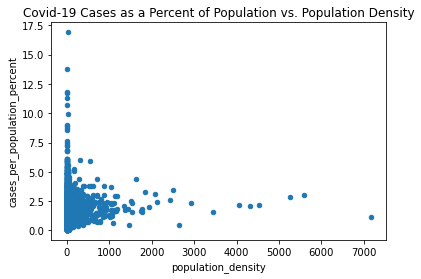

In [69]:
df.plot.scatter(x='population_density', y='cases_per_population_percent', title='Covid-19 Cases as a Percent of Population vs. Population Density')

<AxesSubplot:title={'center':'Covid-19 Cases as a Percent of Population vs. Percent of Individuals who Always Wear a Mask in Public'}, xlabel='always', ylabel='cases_per_population_percent'>

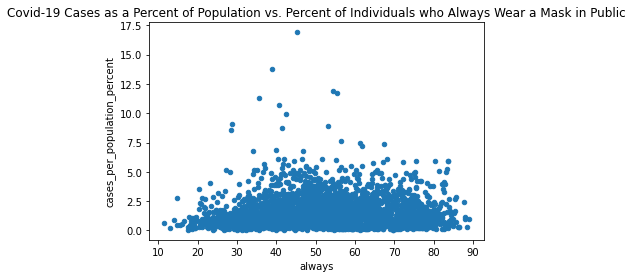

In [70]:
df.plot.scatter(x='always', y='cases_per_population_percent', title='Covid-19 Cases as a Percent of Population vs. Percent of Individuals who Always Wear a Mask in Public')

<AxesSubplot:title={'center':'Covid-19 Cases as a Percent of Population vs. Percent of Individuals who Never Wear a Mask in Public'}, xlabel='never', ylabel='cases_per_population_percent'>

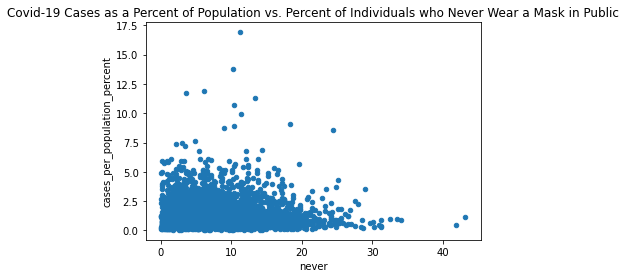

In [71]:
df.plot.scatter(x='never', y='cases_per_population_percent', title='Covid-19 Cases as a Percent of Population vs. Percent of Individuals who Never Wear a Mask in Public')

<AxesSubplot:title={'center':'Covid-19 Cases as a Percent of Population vs. Reported Mask Usage on a Linear 1-5 Scale'}, xlabel='mask_use', ylabel='cases_per_population_percent'>

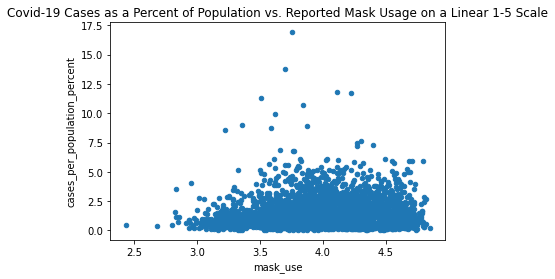

In [72]:
df.plot.scatter(x='mask_use', y='cases_per_population_percent', title='Covid-19 Cases as a Percent of Population vs. Reported Mask Usage on a Linear 1-5 Scale')

<AxesSubplot:title={'center':'Population Density vs. Percent of Individuals who Always Wear a Mask in Public'}, xlabel='always', ylabel='population_density'>

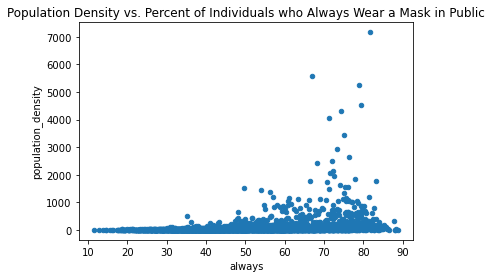

In [73]:
df.plot.scatter(x='always', y='population_density', title='Population Density vs. Percent of Individuals who Always Wear a Mask in Public')

<AxesSubplot:title={'center':'Population Density vs. Percent of Individuals who Never Wear a Mask in Public'}, xlabel='never', ylabel='population_density'>

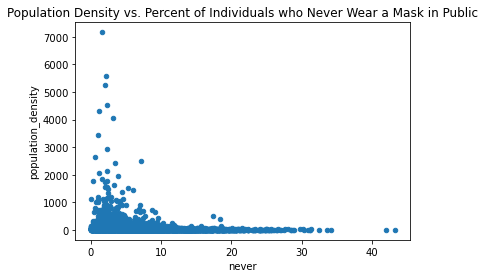

In [74]:
df.plot.scatter(x='never', y='population_density', title='Population Density vs. Percent of Individuals who Never Wear a Mask in Public')

<AxesSubplot:title={'center':'Population Density vs. Reported Mask Usage on a Linear 1-5 Scale'}, xlabel='mask_use', ylabel='population_density'>

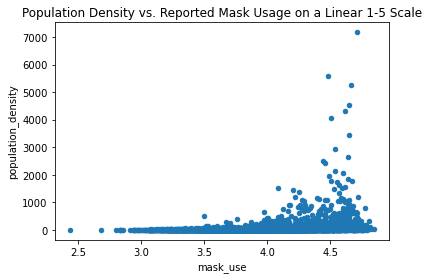

In [75]:
df.plot.scatter(x='mask_use', y='population_density', title='Population Density vs. Reported Mask Usage on a Linear 1-5 Scale')

### Conclusions

Based on this data, it appears that there does not exist a strong correlation between covid-19 cases per unit population and the rate at which individuals respond that they wear a face mask in a public setting in which they expect to be within 6 feet of another person. 

However, this data does show a correlation between population density and mask usage.

These two relationships combined can aid in explaining why the data does not show a strong correlation between population density and covid-19 cases per unit population. The science of how viruses spread would suggest that densely populated areas would be more likely to have higher rates of covid-19 infection. However, since the data shows that densely-populated areas are more likely to wear face masks, and thus probably more likely to take other precautions as well, it makes sense that these densely populated areas that are taking necessary precautions do not have exceedingly high covid-19 rates.

Another interesting insight is that out of the counties with the highest covid-19 rates--those who have more than 8.5% cases of their total population--population density is low across the board and 81.81% of those counties have below average mask usage, indicating that poor mask usage could play a role in infection rates even when population density is low. Despite these correlations, there are only 11 counties who have more than 8.5% cases of their total population, so this sample size is likely too small to draw general conclusions from.

In [76]:
df.sort_values(by='cases_per_population_percent').tail(11)

,fips_code,county,state,cases,population,population_density,cases_per_population_percent,never,always,mask_use
1361,27105,Nobles,Minnesota,1870,21839,11.791576,8.562663,24.4,28.4,3.220
2500,47181,Wayne,Tennessee,1450,16649,8.756484,8.709232,8.9,41.4,3.585
116,5017,Chicot,Arkansas,963,10826,6.487205,8.895252,10.4,53.1,3.874
794,19021,Buena Vista,Iowa,1831,20260,13.606613,9.037512,18.3,28.8,3.355
1667,31043,Dakota,Nebraska,2021,20317,29.684875,9.947335,11.3,42.5,3.617
146,5077,Lee,Arkansas,1006,9398,6.021342,10.704405,10.3,40.7,3.839
2457,47095,Lake,Tennessee,848,7526,17.527547,11.267606,13.3,35.7,3.506
147,5079,Lincoln,Arkansas,1610,13695,9.416006,11.756115,3.5,55.4,4.223
408,13053,Chattahoochee,Georgia,1277,10767,16.713072,11.860314,6.1,54.5,4.110
348,12067,Lafayette,Florida,1207,8744,6.213187,13.803751,10.2,38.9,3.701
